# 1 Introduction

## 1.1 Context

The goal of this project is to explore various machine learning techniques applied to the fused dataset FUSION.csv, which combines two datasets:

kc_house_data.csv : Contains information about houses (price, square footage, number of bedrooms, location, etc.). <br>
MORTGAGE30US.csv : Provides data on average 30-year mortgage rates in the United States.

The final dataset (FUSION.csv) consists of 4117 observations with 22 columns , obtained by merging these two sources using the date as the common key. The dataset has been cleaned, normalized, and enriched with derived features such as:

age: Current year minus the year of construction.<br>
sqft_grade_interaction: Interaction between living space (sqft_living) and the grade of the house.

## 1.2 Objectives

The main objectives of this project are:

- To apply a clustering algorithm (DBSCAN ) to the dataset after dimensionality reduction.
- To analyze the results of the clustering, interpret the clusters, and understand how hyperparameter changes impact the interpretation.
- For the final project, we will choose one technical problem (classification, regression, clustering, or dimensionality reduction) and compare four models addressing the same problem using different algorithm families (e.g., partition-based vs. density-based clustering, linear vs. non-linear regression, etc.).
- We will optimize the hyperparameters of the algorithms using two techniques: Grid Search and Random Search (or Bayesian Optimization).

## 1.3 Methodology

To achieve these objectives, we will follow these steps:

### Data Preparation :
- Load and inspect the quality of the dataset.
- Normalize/standardize the data for better performance of the algorithms.
### Dimensionality Reduction :
- Choose a dimensionality reduction technique to reduce the complexity of the data while preserving meaningful patterns.
- Justify the choice based on the nature of the dataset and the problem at hand.
### Clustering with DBSCAN :
- Use DBSCAN to identify natural groupings in the reduced-dimensional data.
- Analyze the clusters and their significance in relation to the original features.
### Hyperparameter Tuning :
- Explore the impact of hyperparameters (eps and min_samples) on DBSCAN's performance.
- Optimize the hyperparameters using Grid Search and Random Search.
### Final Project: Comparison of Four Models :
- Select one technical problem (classification, regression, clustering, or dimensionality reduction).
- Implement four models from different algorithm families to solve the chosen problem.
- Evaluate and compare their performances, explaining why some models may be better suited than others.

## 1.4 Importance of the Project

This project aims to deepen our understanding of several key machine learning concepts:

- Data preprocessing and cleaning.
- Dimensionality reduction techniques like PCA and UMAP.
- Clustering algorithms such as DBSCAN.
- Hyperparameter optimization methods (Grid Search and Random Search). 

It also provides an opportunity to learn how to interpret model results and choose the best approach for a given problem.

# 2 Data Preparation

Before proceeding with analysis, it is essential to verify the quality of the dataset by checking for missing values and duplicates.

In [2]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the merged dataset
df = pd.read_csv('FUSION.csv')

In [4]:
# Display first lines
print("Aperçu du dataset :")
display(df.head())

Aperçu du dataset :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,MORTGAGE30US
0,2008000270,2015-01-15,291850.0,3,1.5,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,3.66
1,3793500160,2015-03-12,323000.0,3,2.5,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,3.86
2,1175000570,2015-03-12,530000.0,5,2.0,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,3.86
3,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,...,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,4.12
4,6865200140,2014-05-29,485000.0,4,1.0,1600,4300,1.5,0,0,...,1600,0,1916,0,98103,47.6648,-122.343,1610,4300,4.12


In [5]:
# shape and columns
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("Colonnes disponibles :")
display(df.columns)

Nombre de lignes : 4117
Nombre de colonnes : 22
Colonnes disponibles :


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'MORTGAGE30US'],
      dtype='object')

In [6]:
# checking missing values
print("\nValeurs manquantes :")
display(df.isnull().sum())


Valeurs manquantes :


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
MORTGAGE30US     0
dtype: int64

Missing values are checked using isnull().sum() to ensure there are no gaps in the data.

In [7]:
# checking duplicated data
print(f"\nNombre de doublons : {df.duplicated().sum()}")


Nombre de doublons : 0


Duplicates are verified using duplicated().sum() to avoid redundancy in the dataset.

In [8]:
# Ajout de caractéristiques dérivées 
df['age'] = 2024 - df['yr_built']
df['sqft_grade_interaction'] = df['sqft_living'] * df['grade']

- age: Calculated as the difference between the current year (2024) and the year the house was built (yr_built). This helps capture the age of the property. 
- sqft_grade_interaction: Represents the interaction between living space (sqft_living) and the grade of the house (grade). This feature may help identify patterns related to property quality.

In [9]:
# Selecting relevant columns
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'yr_built', 'yr_renovated', 'lat', 'long', 'MORTGAGE30US', 
            'age', 'sqft_grade_interaction']

We select relevant features for clustering based on their potential impact on grouping patterns. These include:

- House-related features: price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade. <br>
- Location-related features: lat, long. <br>
- Time-related features: yr_built, yr_renovated, age. <br>
- Interaction feature: sqft_grade_interaction (interaction between sqft_living and grade).

In [10]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Conversion en DataFrame pour plus de lisibilité
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [11]:
# Display normalized data
print("\nDonnées normalisées :")
display(df_scaled.head())


Données normalisées :


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,MORTGAGE30US,age,sqft_grade_interaction
0,-0.693801,-0.403908,-0.801577,-1.126662,-0.136014,-0.913608,-0.084225,-0.306105,-0.623815,-0.537939,-0.265699,-0.216903,-1.054429,-0.691774,-1.557282,0.265699,-0.924817
1,-0.603647,-0.403908,0.506297,-0.200188,-0.221663,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,1.095699,-0.216903,-1.349135,1.330704,-0.546167,-1.095699,-0.339489
2,-0.004554,1.729369,-0.147640,-0.289487,-0.268143,0.016032,-0.084225,-0.306105,-0.623815,-0.537939,-2.409902,-0.216903,0.813476,-1.254365,-0.546167,2.409902,-0.395906
3,-0.395267,-0.403908,-0.147640,-0.200188,-0.018345,0.945672,-0.084225,-0.306105,-0.623815,-0.537939,0.789385,-0.216903,1.227212,1.822081,0.768283,-0.789385,-0.339489
4,-0.134791,0.662731,-1.455515,-0.523896,-0.283093,0.016032,-0.084225,-0.306105,0.889589,-0.537939,-1.865343,-0.216903,0.776190,-0.891173,0.768283,1.865343,-0.544001


Clustering algorithms like DBSCAN rely on distance metrics, so it is crucial to normalize the data to ensure all features contribute equally to the analysis <br>
Normalization ensures that features with larger scales (e.g., price, sqft_living) do not dominate the clustering process. <br>
The normalized data is converted back to a Pandas DataFrame for easier interpretation.

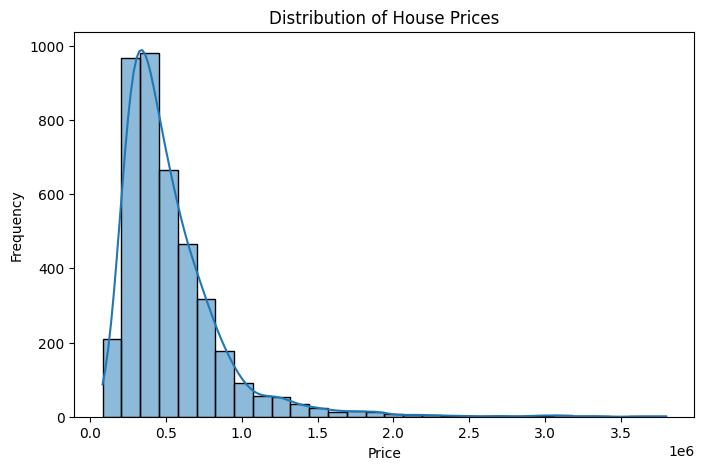

In [12]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


- The majority of homes are priced between $300,000 and $500,000, which is the most common range.
- The distribution is skewed to the right, indicating the presence of a few luxury homes with much higher prices (up to about $3,800,000).
- The outliers on the right likely represent exceptional properties, such as villas or houses located in highly sought-after areas.

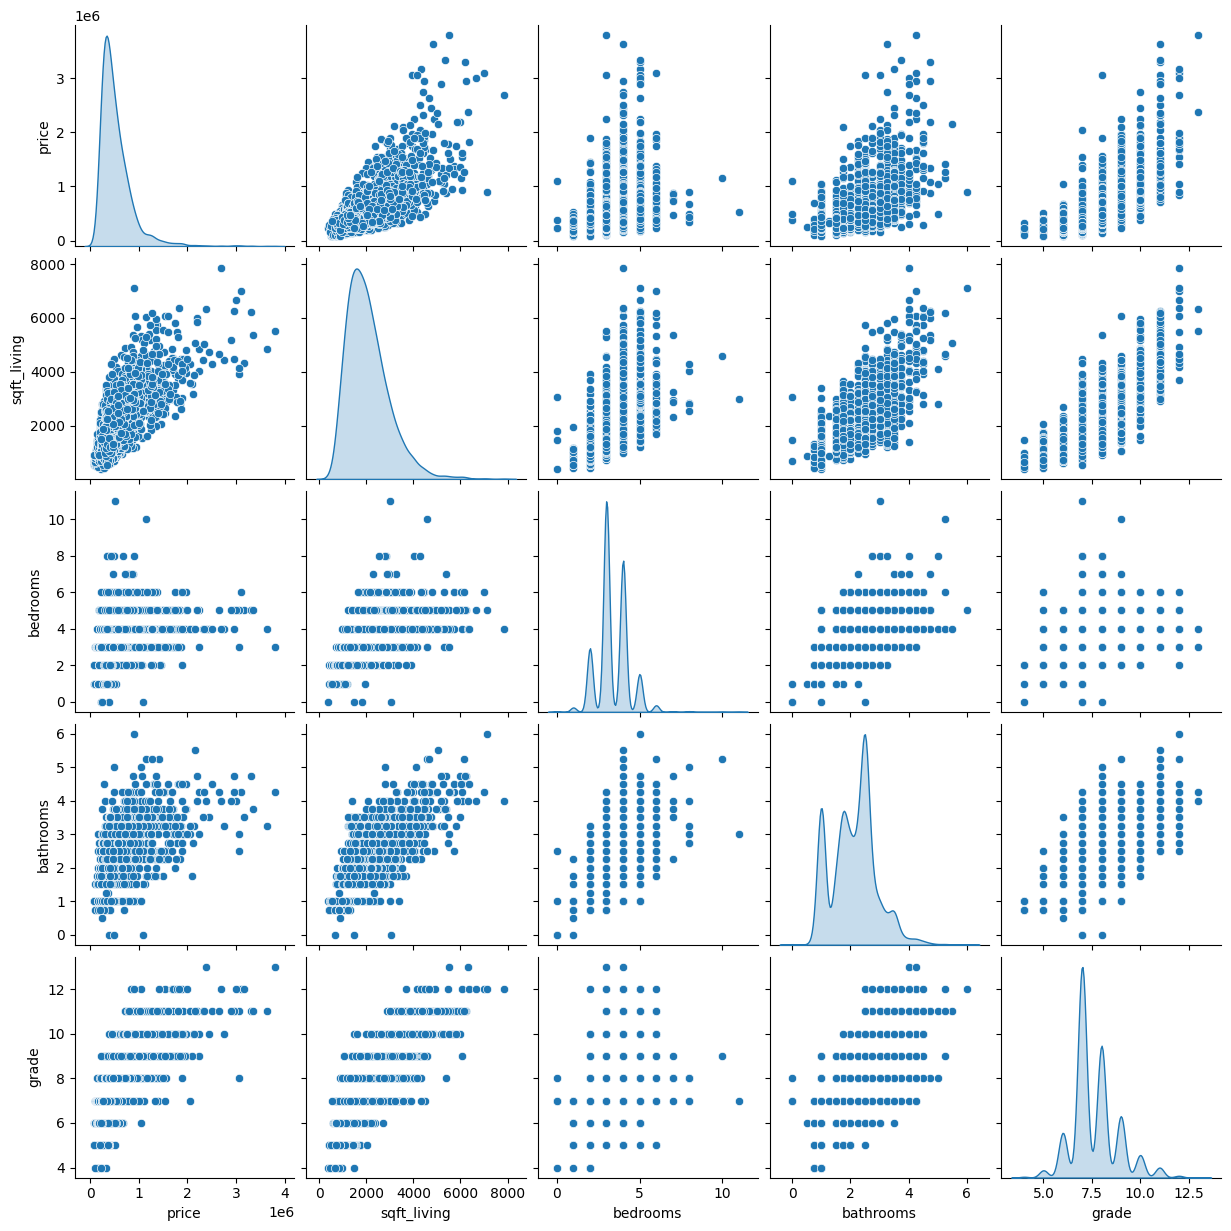

In [13]:
# Pairplot to visualize relationships between selected features
selected_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

price vs sqft_living :
A strong positive correlation is visible between price and sqft_living. This means that larger homes are generally more expensive.

price vs bedrooms :
There is no obvious linear relationship between price and number of bedrooms. This can be explained by the fact that other factors (such as location or grade) also influence price.

price vs bathrooms :
A slight positive trend is observable, showing that homes with more bathrooms tend to cost more.

price vs grade :
A strong positive correlation exists between price and home grade. Homes with a better grade (quality of construction and finishes) are significantly more expensive.

Diagonal plots show the distribution of each individual variable. For example, sqft_living follows a normal distribution, while bedrooms is discrete.

A brief exploration of the dataset helps us understand its characteristics and distribution. <br>
At the end of this step, the dataset is ready for further analysis:

- Missing values and duplicates have been checked and confirmed absent.
- Derived features (age, sqft_grade_interaction) have been added to enrich the dataset.
- The data has been normalized to ensure consistent scales across features.

This preparation ensures that subsequent steps, such as dimensionality reduction and clustering, will yield meaningful results.

## 3 Dimensionality Reduction

### 3.1 Introduction

Dimension reduction aims to project data into a lower-dimensional space while preserving as much important information as possible. This step is crucial for:
- Reduce the complexity of the dataset.
- Eliminate noise and capture essential relationships between variables.
- Facilitate the visualization and interpretation of clusters.

In our case, we chose to use UMAP (Uniform Manifold Approximation and Projection) for several reasons:
- The "curse of dimensionality" problem: Distance-based algorithms, such as DBSCAN, suffer from degraded performance when the number of dimensions increases. This results in a loss of sensitivity to local distances, making it difficult to identify meaningful clusters.
- Advantages of UMAP: Unlike PCA, which captures only the directions of maximum (linear) variance, UMAP better preserves the complex and nonlinear local structures of the data. This makes it an ideal choice to identify natural groups in our dataset.


### 3.2 Initial Experiment

Before dimensionality reduction, we tried to apply DBSCAN directly on the raw data. Here is what we observed

In [16]:
# Tentative d'application de DBSCAN sur les données brutes
from sklearn.cluster import DBSCAN

dbscan_raw = DBSCAN(eps=0.5, min_samples=5)
clusters_raw = dbscan_raw.fit_predict(df_scaled)

# Compter le nombre de clusters et de points considérés comme bruit
num_clusters_raw = len(set(clusters_raw)) - (1 if -1 in clusters_raw else 0)
num_noise_raw = list(clusters_raw).count(-1)

print(f"Nombre de clusters après DBSCAN sur données brutes: {num_clusters_raw}")
print(f"Nombre de points considérés comme bruit: {num_noise_raw}")

Nombre de clusters après DBSCAN sur données brutes: 4
Nombre de points considérés comme bruit: 4093


Résultats : 

Nombre de clusters identifiés : 4 (après application de DBSCAN sur les données brutes). <br>
Nombre de points considérés comme bruit : 4093 (soit environ 99.4% des données).

Interprétation :

Ces résultats montrent que l'application directe de DBSCAN sur les données brutes conduit à une segmentation limitée et peu significative :

- Fort taux de bruit : Lorsque nous avons appliqué DBSCAN directement sur les données brutes avec les paramètres par défaut (eps=0.5 et min_samples=5), la majorité des observations (environ 99.4%) ont été classifiées comme bruit. Ce résultat montre que ces paramètres ne permettaient pas de capturer des groupements denses dans l'espace multidimensionnel initial. Cette expérience initiale confirme l'importance de réduire la dimensionalité avant d'appliquer DBSCAN, afin de faciliter la détection de clusters significatifs. Nous analyserons plus en détail dans la section suivante comment le choix des hyperparamètres (eps et min_samples) influence les résultats et leur interprétation.
- Impact de la haute dimensionalité : Le problème principal réside dans la "curse of dimensionality". Avec un grand nombre de dimensions, les distances entre les points deviennent moins significatives, rendant difficile l'identification de clusters denses.

En conséquence, DBSCAN considère la plupart des points comme isolés et donc comme du bruit.

Conclusion :

Les résultats obtenus avec DBSCAN sur les données brutes montrent clairement ses limitations dans un contexte à haute dimensionalité. Pour remédier à ce problème, il est essentiel de réduire la dimensionnalité des données avant d'appliquer l'algorithme. Cette étape permettra de capturer les relations essentielles entre les variables tout en simplifiant l'espace de recherche pour DBSCAN

### 3.3 Solution Adoptée

Pour remédier à ce problème, nous avons décidé de réduire la dimensionnalité avant d'appliquer DBSCAN. Après avoir testé différentes techniques (PCA et UMAP), nous avons opté pour UMAP pour les raisons suivantes :

Preservation des Structures Locales :
UMAP est capable de capturer des relations complexes et non linéaires entre les variables, ce qui est crucial pour identifier des clusters significatifs.<br>

Performances Supérieures :
Comparé à PCA, UMAP a produit des résultats plus granulaires et pertinents lors de nos expérimentations précédentes. <br>

Visualisation en 3D :
UMAP permet une projection en 3D qui facilite l'interprétation visuelle des clusters.

### 3.4 Implémentation de UMAP

In [17]:
# Importation de UMAP
import umap.umap_ as umap

# Réduction de dimension avec UMAP (3D)
umap_reducer = umap.UMAP(n_components=3, random_state=42)
df_umap = umap_reducer.fit_transform(df_scaled)

# Conversion en DataFrame pour facilité l'analyse
df_umap = pd.DataFrame(df_umap, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ousma\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We chose n_components=3 to project the data into 3D space, making it easier to visualize while retaining enough information. <br>
The random_state=42 parameter ensures reproducibility of the results.

### 3.5 Visualization of Results and Analysis of Information Retained or Lost

In [21]:
df_umap

,UMAP_1,UMAP_2,UMAP_3
0,9.971899,12.671098,8.372854
1,10.444705,1.939079,10.051884
2,9.455112,12.080676,6.247085
3,11.944988,5.025126,9.861812
4,11.548579,9.836367,3.180422
...,...,...,...
4112,9.786391,3.839981,9.902029
4113,9.933907,0.080883,3.881516
4114,9.651025,12.623500,9.576875
4115,10.107936,3.816766,7.953895


In [24]:
# Visualize UMAP-reduced data in 3D
fig = px.scatter_3d(df_umap, x="UMAP_1", y="UMAP_2", z="UMAP_3", 
                    title="Data Projection with UMAP (3D)", opacity=0.7)
fig.show()

La projection montre que les données se regroupent naturellement en plusieurs clusters distincts.<br>

#### Comparison with Original Data

Après avoir réduit la dimensionnalité avec UMAP, il est important de discuter des informations conservées ou perdues :

Informations Conservées : 
- UMAP conserve les structures locales des données, ce qui signifie que les similarités entre les points proches sont bien préservées.
- Certains clusters pourraient correspondre à des maisons similaires en termes de prix, superficie, ou localisation.<br>
- Les outliers (points isolés) pourraient représenter des maisons atypiques (luxueuses ou anciennes).

Informations Perdues :
- Bien que UMAP conserve les structures locales des données, certaines relations globales (comme celles liées aux variables zipcode ou yr_built) peuvent être atténuées. Cependant, dans notre cas, ces pertes sont minimes par rapport aux avantages apportés par la simplification de l'espace de recherche.

### 3.6 Conclusion

The UMAP dimensionality reduction technique successfully projects our high-dimensional dataset into a 3D space while preserving important local structures. This simplification will greatly enhance the performance of subsequent analyses, particularly clustering algorithms like DBSCAN. By reducing noise and focusing on meaningful patterns, UMAP ensures that the reduced dataset remains informative and interpretable.



# 4 Clustering with DBSCAN